In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train = pd.read_csv('train.csv')
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [44]:
train.shape

(10000, 12)

In [45]:
train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [46]:
test = pd.read_csv('test.csv')
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [47]:
test.shape

(2500, 11)

In [48]:
test.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

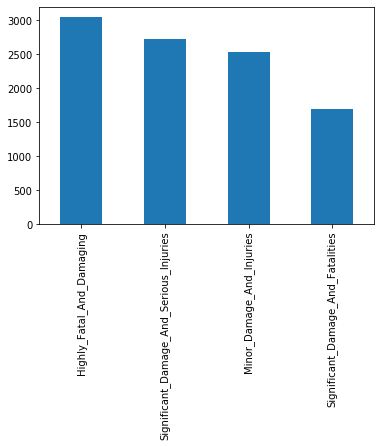

In [49]:
train['Severity'].value_counts().plot(kind = 'bar')

In [8]:
train = train.drop('Accident_ID', axis = 1)
newtest = test
newtest = newtest.drop('Accident_ID', axis = 1)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Severity'] = le.fit_transform(train['Severity'])

In [10]:
x = train.drop('Severity', axis = 1)
y = train['Severity']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7454857368386952


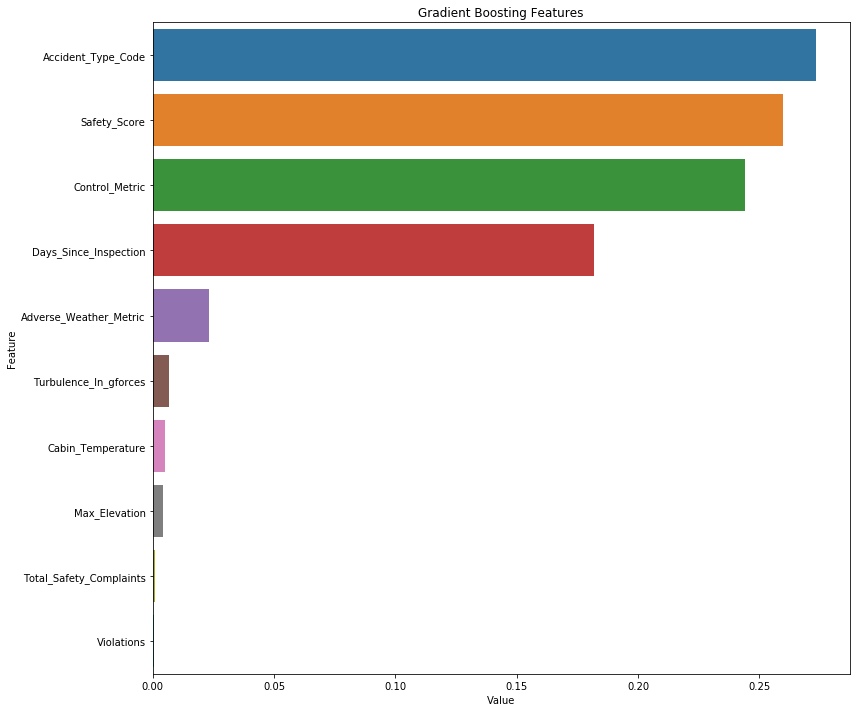

In [16]:
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, x.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [18]:
x = train.drop(['Violations', 'Total_Safety_Complaints'], axis = 1)
y = train['Severity']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [20]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.0003124616987582696


In [33]:
x_train = train.drop(['Violations', 'Total_Safety_Complaints', 'Severity'], axis = 1)
y_train = train['Severity']
x_test = newtest.drop(['Violations', 'Total_Safety_Complaints'], axis = 1)

In [34]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [35]:
solution = pd.DataFrame({'Accident_ID': test.Accident_ID, 'Severity': y_pred})
solution.head()

,Accident_ID,Severity
0,1,0.288870
1,10,2.007184
2,14,2.521636
3,17,1.059733
4,21,0.908553


In [36]:
solution['Severity'] = np.round(solution['Severity'].astype(int))
solution.head()

,Accident_ID,Severity
0,1,0
1,10,2
2,14,2
3,17,1
4,21,0


In [37]:
solution['Severity'] = le.inverse_transform(solution['Severity'])
solution.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Fatalities
3,17,Minor_Damage_And_Injuries
4,21,Highly_Fatal_And_Damaging


In [41]:
solution['Severity'].value_counts()

Minor_Damage_And_Injuries                  1162
Highly_Fatal_And_Damaging                   713
Significant_Damage_And_Fatalities           624
Significant_Damage_And_Serious_Injuries       1
Name: Severity, dtype: int64

In [40]:
solution.to_csv('Solution1.csv', index = False)